In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [18]:
df=pd.read_excel("'Car_Trade_Scraping.xlsx")
df

,Name,Price,Number_of_Kms,Fuel,Location,Manufacture_year,Make
0,2017 MARUTI SUZUKI DZIRE VXI AMT,"6,25,000","20,368",Petrol,Mumbai,2017,Maruti Suzuki
1,2015 MARUTI SUZUKI S-CROSS ZETA 1.3,"7,15,000","49,800",Diesel,Mumbai,2015,Maruti Suzuki
2,2017 MARUTI SUZUKI CELERIO VXI [2017-2019],"4,25,000","10,000",Petrol,Mumbai,2017,Maruti Suzuki
3,2017 MARUTI SUZUKI CIAZ ZETA 1.4 MT,"7,45,000","25,000",Petrol,Mumbai,2017,Maruti Suzuki
4,2013 MARUTI SUZUKI SX4 ZXI,"3,75,000","88,089",Petrol,Mumbai,2013,Maruti Suzuki
...,...,...,...,...,...,...,...
6195,2018 HYUNDAI GRAND I10 SPORTS EDITION 1.2L KAP...,"5,75,000","19,920",Petrol,Mumbai,2018,Hyundai
6196,2012 HYUNDAI I20 MAGNA 1.4 CRDI,"3,95,111","72,511",Diesel,Mumbai,2012,Hyundai
6197,2010 HYUNDAI I10 SPORTZ 1.2,"2,15,000","70,123",Petrol,Thane,2010,Hyundai
6198,2017 HYUNDAI ELITE I20 MAGNA EXECUTIVE 1.2,"5,50,000","20,000",Petrol,Mumbai,2017,Hyundai


In [19]:
df.keys()

Index(['Name', 'Price', 'Number_of_Kms', 'Fuel', 'Location',
       'Manufacture_year', 'Make'],
      dtype='object')

In [20]:
df.shape

(6200, 7)

In [21]:
df.dtypes

Name                object
Price               object
Number_of_Kms       object
Fuel                object
Location            object
Manufacture_year     int64
Make                object
dtype: object

<AxesSubplot:>

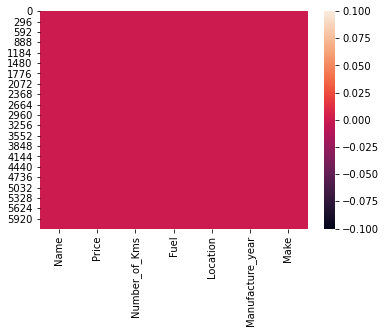

In [22]:
sns.heatmap(df.isnull())

In [23]:
# Removing unwanted words/ signs from dataframe
df['Price'] = df['Price'].str.replace(",","")
df['Number_of_Kms'] = df['Number_of_Kms'].str.replace(",","")

<AxesSubplot:xlabel='Fuel', ylabel='count'>

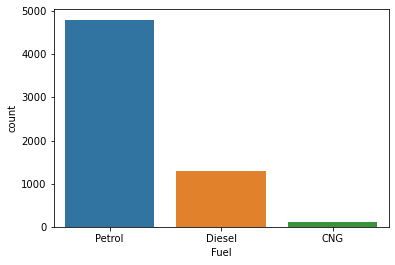

In [24]:
sns.countplot(x='Fuel',data=df)

In [25]:
#Maximum number of cars listed on the website runs on Petrol, followed by Deisel

<AxesSubplot:xlabel='Location', ylabel='count'>

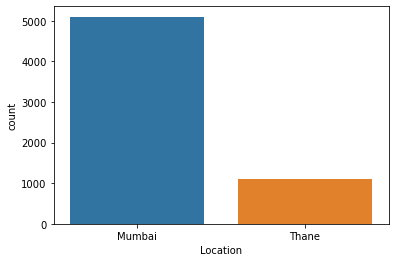

In [26]:
sns.countplot(x='Location',data=df)

<AxesSubplot:xlabel='Manufacture_year', ylabel='count'>

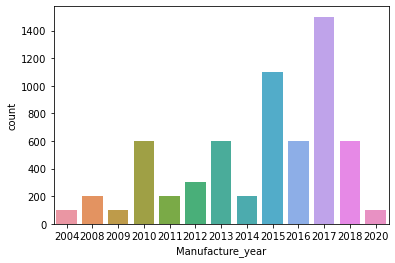

In [27]:
sns.countplot(x='Manufacture_year',data=df)

<AxesSubplot:xlabel='count', ylabel='Make'>

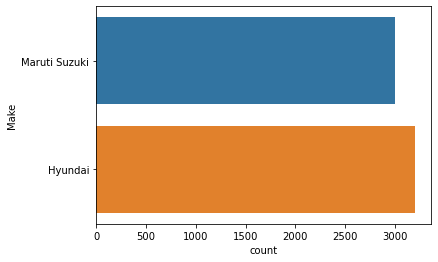

In [28]:
sns.countplot(y='Make',data=df)

In [29]:
df["Fuel"].value_counts()

Petrol    4800
Diesel    1300
CNG        100
Name: Fuel, dtype: int64

In [30]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df.replace({"Petrol": 0, "Diesel":1,"CNG":2}, inplace = True)

In [31]:
df["Location"].value_counts()

Mumbai    5100
Thane     1100
Name: Location, dtype: int64

In [32]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df.replace({"Mumbai": 0, "Thane":1}, inplace = True)

In [33]:
df["Make"].value_counts()

Hyundai          3200
Maruti Suzuki    3000
Name: Make, dtype: int64

In [34]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df.replace({"Hyundai": 0, "Maruti Suzuki":1}, inplace = True)
df

,Name,Price,Number_of_Kms,Fuel,Location,Manufacture_year,Make
0,2017 MARUTI SUZUKI DZIRE VXI AMT,625000,20368,0,0,2017,1
1,2015 MARUTI SUZUKI S-CROSS ZETA 1.3,715000,49800,1,0,2015,1
2,2017 MARUTI SUZUKI CELERIO VXI [2017-2019],425000,10000,0,0,2017,1
3,2017 MARUTI SUZUKI CIAZ ZETA 1.4 MT,745000,25000,0,0,2017,1
4,2013 MARUTI SUZUKI SX4 ZXI,375000,88089,0,0,2013,1
...,...,...,...,...,...,...,...
6195,2018 HYUNDAI GRAND I10 SPORTS EDITION 1.2L KAP...,575000,19920,0,0,2018,0
6196,2012 HYUNDAI I20 MAGNA 1.4 CRDI,395111,72511,1,0,2012,0
6197,2010 HYUNDAI I10 SPORTZ 1.2,215000,70123,0,1,2010,0
6198,2017 HYUNDAI ELITE I20 MAGNA EXECUTIVE 1.2,550000,20000,0,0,2017,0


In [35]:
# We don't need the Name Column for model building hence we will drop this column
df.drop(columns=["Name"],inplace=True)

In [36]:
df

,Price,Number_of_Kms,Fuel,Location,Manufacture_year,Make
0,625000,20368,0,0,2017,1
1,715000,49800,1,0,2015,1
2,425000,10000,0,0,2017,1
3,745000,25000,0,0,2017,1
4,375000,88089,0,0,2013,1
...,...,...,...,...,...,...
6195,575000,19920,0,0,2018,0
6196,395111,72511,1,0,2012,0
6197,215000,70123,0,1,2010,0
6198,550000,20000,0,0,2017,0


In [37]:
df.dtypes

Price               object
Number_of_Kms       object
Fuel                 int64
Location             int64
Manufacture_year     int64
Make                 int64
dtype: object

In [38]:
# finding correlation b/w eachother

dfcor=df.corr()
dfcor

,Fuel,Location,Manufacture_year,Make
Fuel,1.000000,-0.151035,0.120887,0.260061
Location,-0.151035,1.000000,-0.282898,-0.111737
Manufacture_year,0.120887,-0.282898,1.000000,-0.041239
Make,0.260061,-0.111737,-0.041239,1.000000


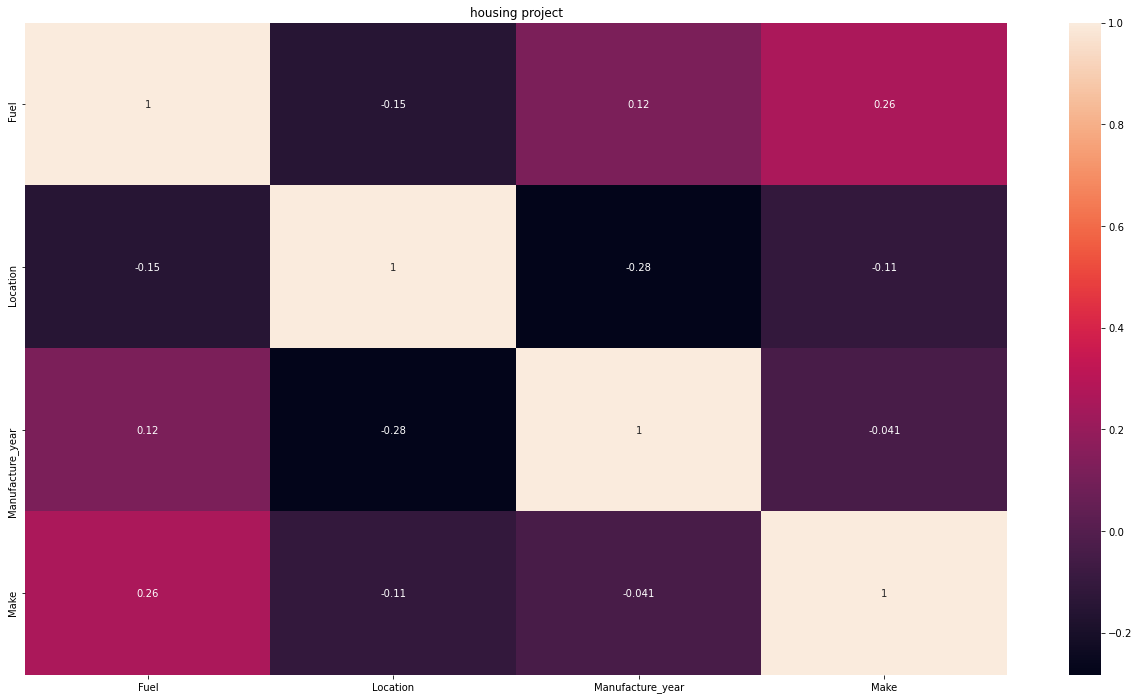

In [39]:
# we can put this correlation into a heat map

plt.figure(figsize=[22,12])
sns.heatmap(dfcor,annot=True)
plt.title('housing project')
plt.show()

In [40]:
df.skew()

Price               0.757988
Number_of_Kms       5.034511
Fuel                1.678073
Location            1.689210
Manufacture_year   -0.941354
Make                0.064565
dtype: float64

In [41]:
#spliting the independent and target variables in x and y
x=df.drop('Price',axis=1)
y=df['Price']

In [42]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4960, 5)
(1240, 5)
(4960,)
(1240,)


In [43]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [44]:
print(selection.feature_importances_)

[0.20700276 0.10167808 0.0273777  0.57773499 0.08620647]


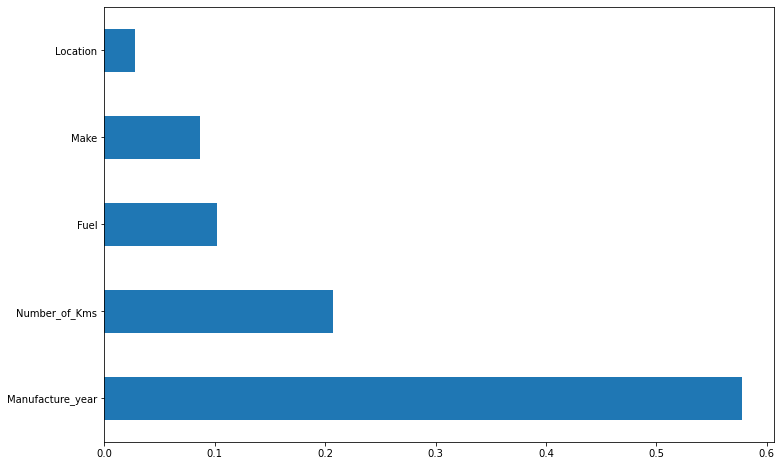

In [45]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [47]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [48]:
y_pred = reg_rf.predict(x_test)

In [49]:
reg_rf.score(x_train, y_train)

1.0

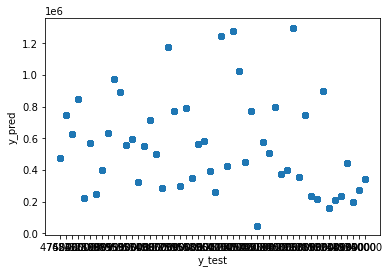

In [50]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [51]:
from sklearn import metrics

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [53]:
metrics.r2_score(y_test, y_pred)

1.0

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [57]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [58]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [59]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [60]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [61]:
prediction = rf_random.predict(x_test)

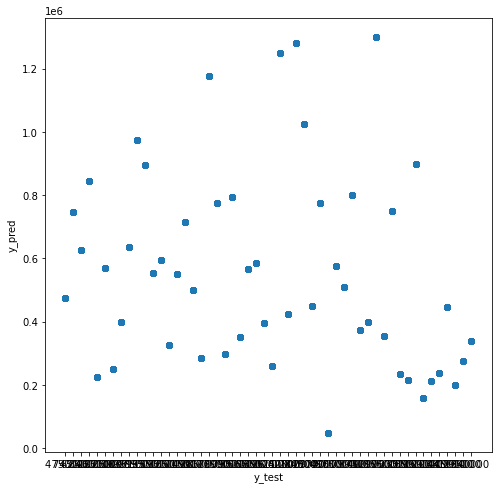

In [62]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [64]:
import pickle
filename="Used_car_price_Prediction.csv"
pickle.dump(reg_rf,open(filename,"wb"))